# <center>Métodos de Otimização de Sistemas Mecânicos - IM380</center>
# <center> Arthur França Martins </center>

___

Cada solução de capítulo será feita em um tópico separado, no entanto, será necessário rodar o primeiro bloco de *Imports* para importar as bibliotecas empregadas na solução dos problemas.

In [1]:
#Import de bibliotecas utilizadas no decorrer dos exercícios

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Capítulo 3 - Minimização Irrestrita Univariável

## 3.1 Busca Dicotômica

O primeiro exercício consiste em formular o algorítimo para o método supracitado

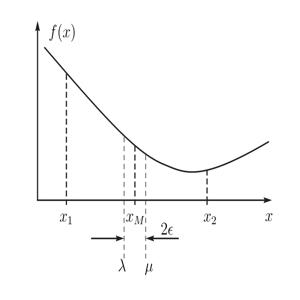

In [2]:
Image.open("BuscaDicotomica.png").resize((300,300))

In [101]:
def f(x): 
    return x**2 + x + 2

In [104]:
def grafico(min, max, funcao, passo):
    x = np.arange(min,max,passo)
    plt.figure(figsize=(3, 3))
    plt.plot(x,funcao(x))
    plt.xlabel("X")
    plt.ylabel("f(x)")
    plt.title("Gráfico da Função")
    plt.grid()

In [109]:

def encontrarMinimo(valor1, valor2, erro,  funcao = f, max_iteracoes=100, passo=0.1):
    grafico(valor1, valor2, funcao, passo)
    iteracoes = 0
    while abs(valor1 - valor2) >= 2*erro:
        xm = (valor1+valor2)/2
        xMu = xm + erro/2
        xLambda = xm - erro/2
        
        f_mu = funcao(xMu)
        f_lambda = funcao(xLambda)
        
        if f_mu > f_lambda:
            valor2 = xMu
        elif f_mu < f_lambda:
            valor1 = xLambda
        iteracoes += 1
        
        plt.plot(xm,funcao(xm),'go')
        
    return (valor1+valor2)/2

-0.49999911102056516

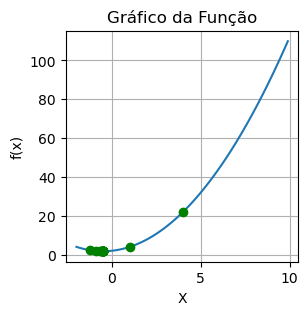

In [110]:
x1 = -2
x2 = 10

encontrarMinimo(x1,x2,0.00001)